# Vis of DeepGaze resutls

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
IG = pd.read_csv('IG'+'_mean_noface.csv', index_col=[0])
SIM = pd.read_csv('SIM'+'_mean_noface.csv', index_col=[0])
NSS = pd.read_csv('NSS'+'_mean_noface.csv', index_col=[0])
AUC = pd.read_csv('AUC'+'_mean_noface.csv', index_col=[0])


In [4]:
SIM

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,0.410865,0.407912,0.502755,0.391060,0.438167,0.405628
covsal,0.437098,0.435892,0.474611,0.431493,0.432125,0.431504
gbvs,0.456899,0.453540,0.561441,0.439632,0.455956,0.451624
icf,0.463685,0.461694,0.525637,0.439458,0.475725,0.455837
ik,0.387092,0.384829,0.456805,0.369226,0.393532,0.387091
sun,0.349760,0.346092,0.463924,0.322741,0.331072,0.347655
dg,0.627605,0.627135,0.642248,0.610889,0.637648,0.623710


In [5]:
sim = SIM.loc[['dg']]
auc = AUC.loc[['dg']]
nss = NSS.loc[['dg']]
ig = IG.loc[['dg']]

In [6]:
ig

,all,person,no person,animal,sports,electronic
dg,2.857174,2.807331,4.408419,2.892242,2.157273,2.979467


In [7]:
sim.values[0]

array([0.62760501, 0.62713451, 0.64224786, 0.61088898, 0.6376476 ,
       0.62371014])

In [8]:
DG = pd.DataFrame([sim.values[0], auc.values[0], nss.values[0], ig.values[0]],
                  index=['sim', 'auc', 'nss', 'ig'], 
                  columns=['all', 'person', 'no person', 'animal', 'sports', 'electronic'])
DG

,all,person,no person,animal,sports,electronic
sim,0.627605,0.627135,0.642248,0.610889,0.637648,0.623710
auc,0.794056,0.795969,0.734526,0.794398,0.814887,0.795691
nss,1.329065,1.344346,0.853478,1.309132,1.478322,1.341571
ig,2.857174,2.807331,4.408419,2.892242,2.157273,2.979467


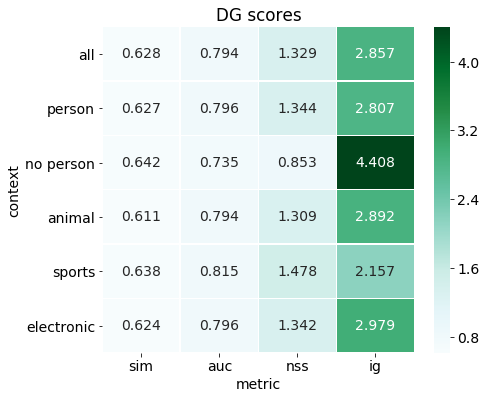

In [9]:
matplotlib.rcParams.update({'font.size': 14})

f, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(DG.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f', cmap='BuGn');
plt.xlabel('metric')
plt.ylabel('context')
plt.title('{} scores'.format('DG'));

plt.savefig('../plots/DG_scores.png', bbox_inches='tight', pad_inches=0)